**Group**

Zohaib Khan SP25-RAI-023

Muhammad Yaseen SP25-RAI-014



Paper Selection:

Two Papers have been shortlisted

1st Paper(Run Scenrios on this)

Paper Link: https://www.nature.com/articles/s41598-024-74656-2

DataSet Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease



2nd Paper:(Didn't run scenrios on this as this was not W category paper)

Paper Link: https://ieeexplore.ieee.org/document/9057891






**bold text**

```
Adding Required Libraries
```



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


Load and Inspect the Dataset

In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

print("First five rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

First five rows of the dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes    

DataSet Preporocessing

In [3]:
data = pd.read_csv('heart_2020_cleaned.csv')

print("Original Columns:")
print(data.columns)

data.columns = data.columns.str.strip().str.lower()
print("Standardized Columns:")
print(data.columns)

if 'heartdisease' in data.columns:
    print("Target column 'heartdisease' found.")
else:
    raise KeyError("The target column 'heartdisease' is not found in the dataset.")

X = data.drop(columns=['heartdisease'])
y = data['heartdisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split successful. Ready for modeling!")

Original Columns:
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Standardized Columns:
Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')
Target column 'heartdisease' found.
Data split successful. Ready for modeling!


Univariate Analysis

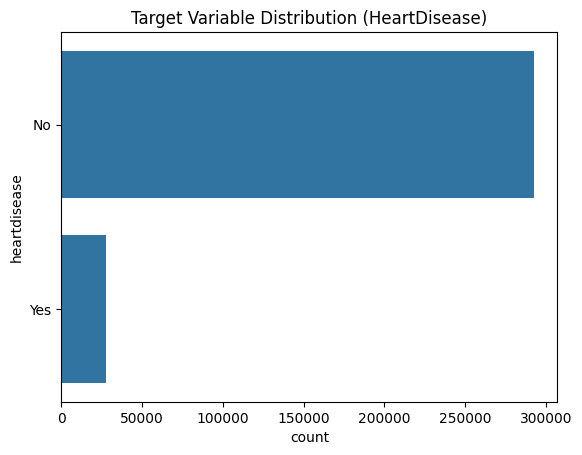


Summary Statistics for Numerical Features:
                 bmi  physicalhealth   mentalhealth      sleeptime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


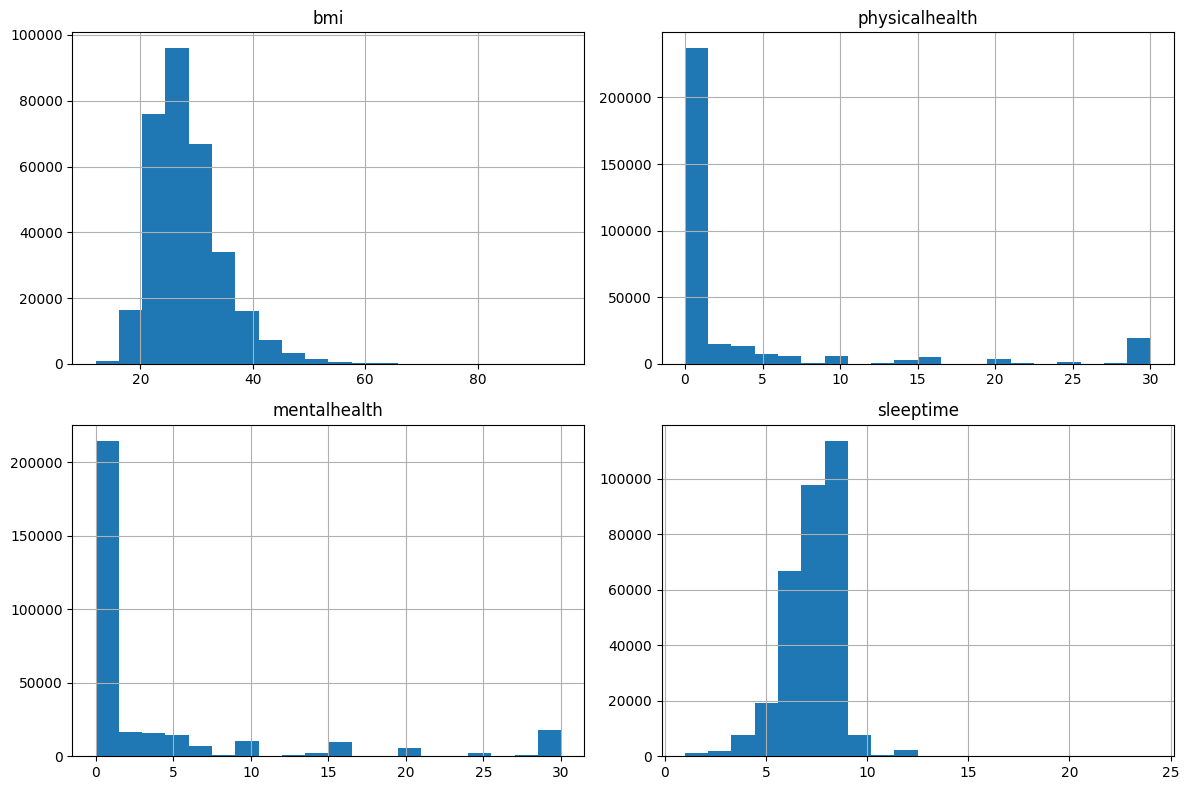

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['heartdisease'])
plt.title('Target Variable Distribution (HeartDisease)')
plt.show()

numerical_cols = ['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_cols].describe())

data[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

Bivariate Analysis

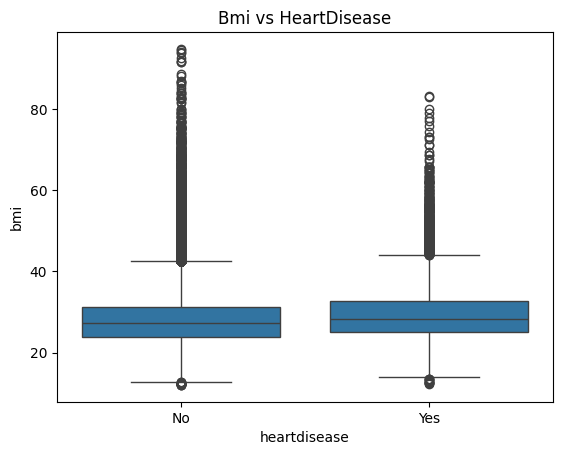

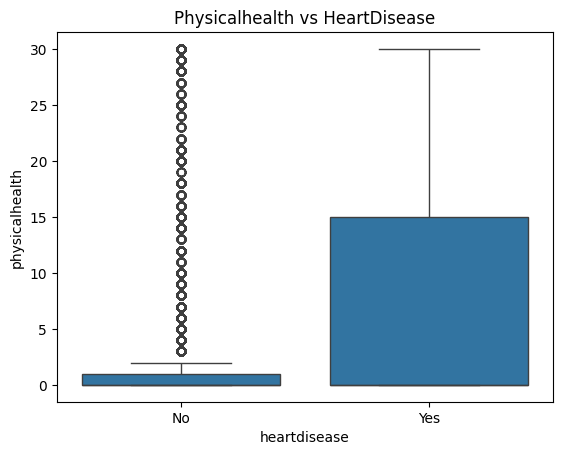

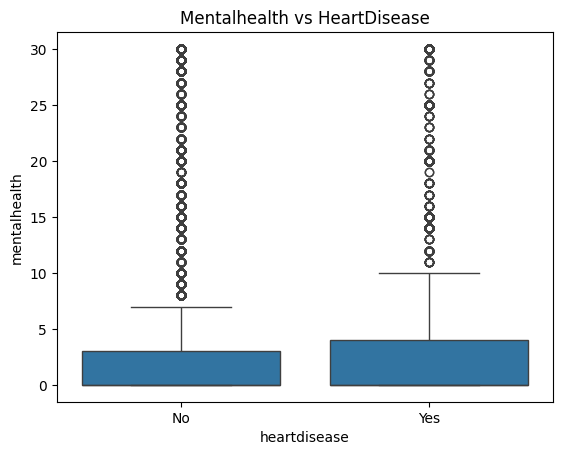

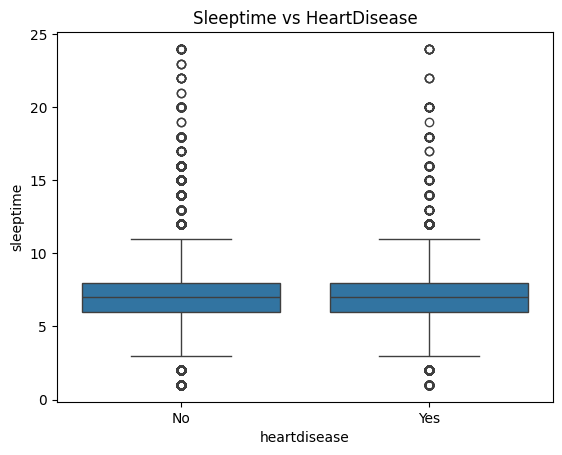

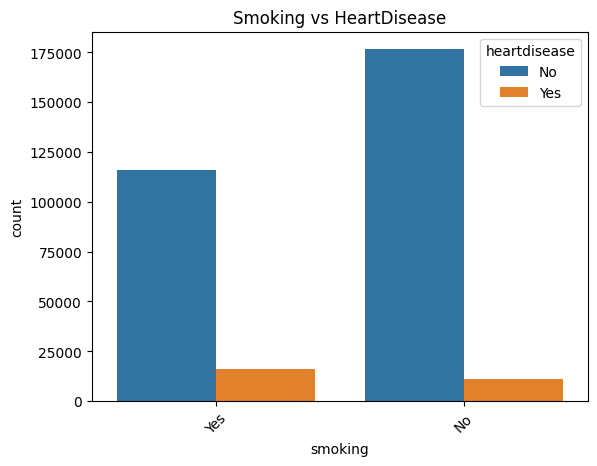

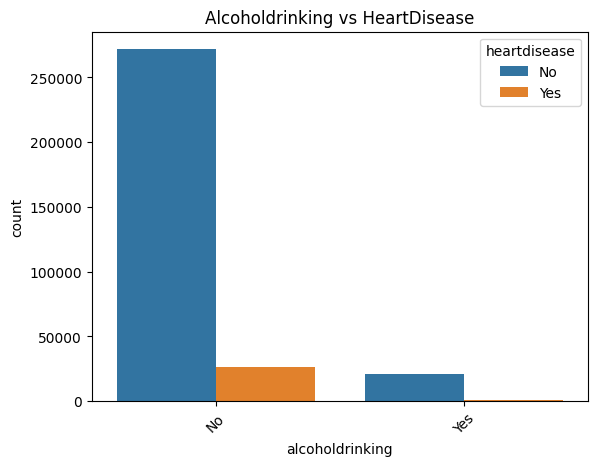

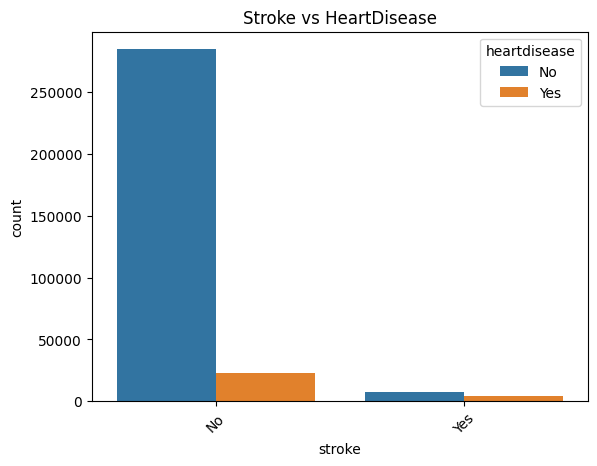

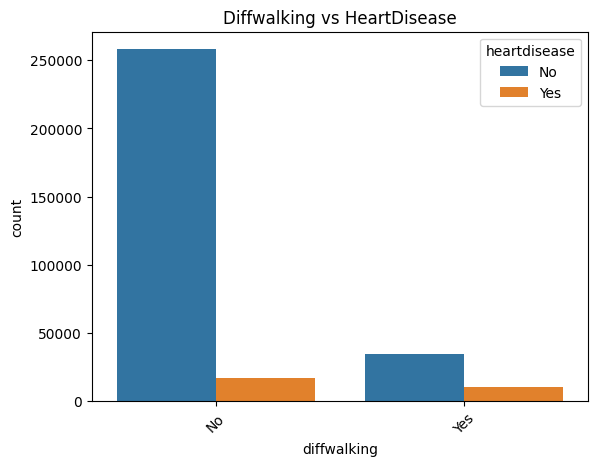

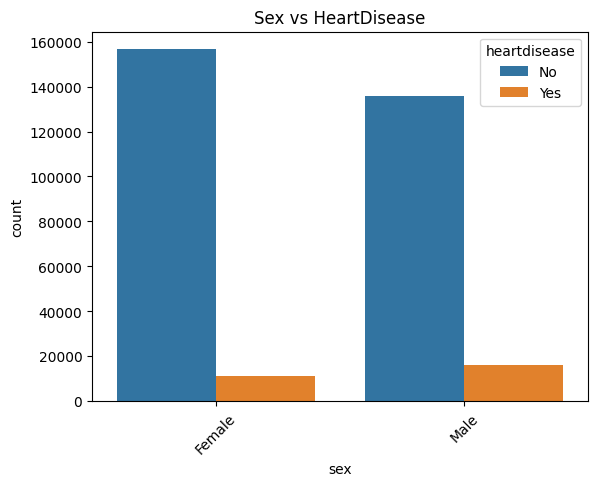

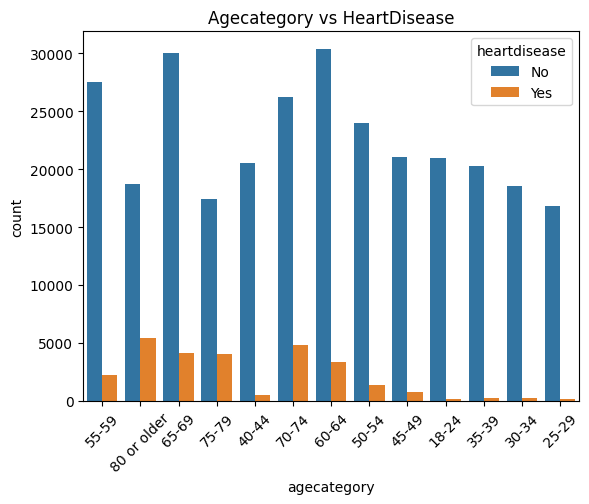

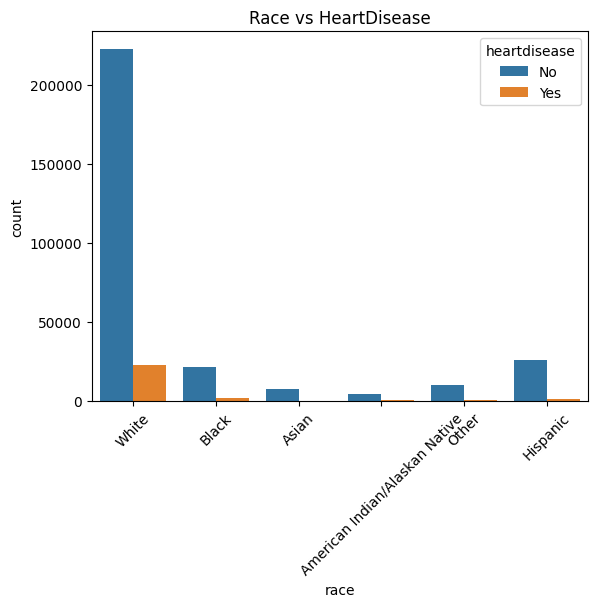

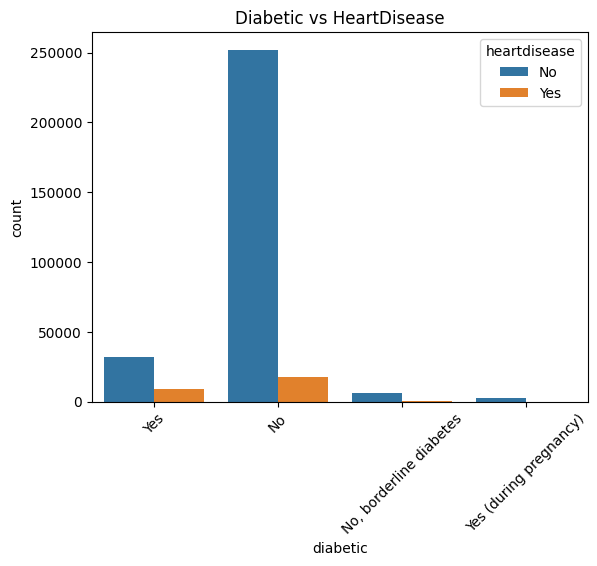

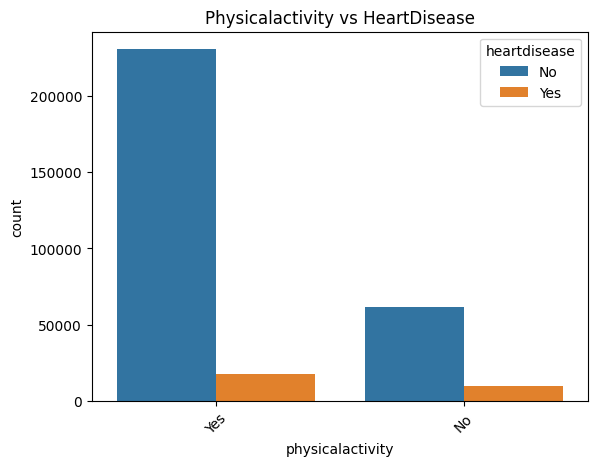

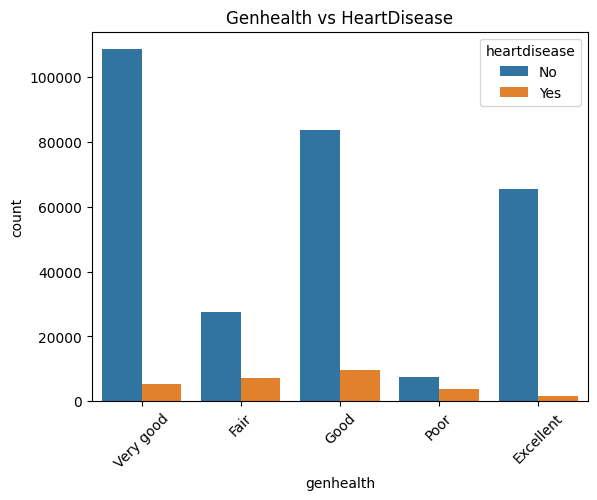

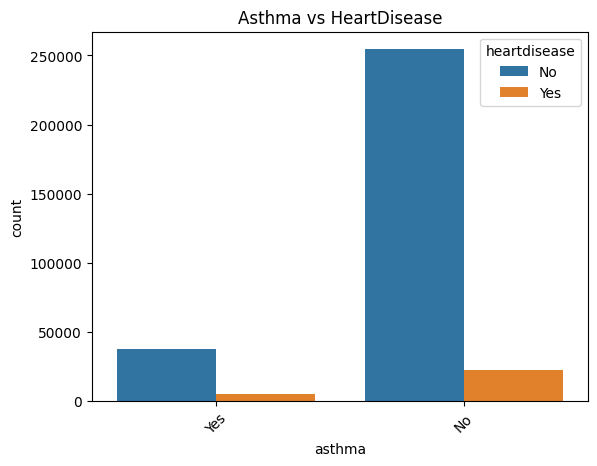

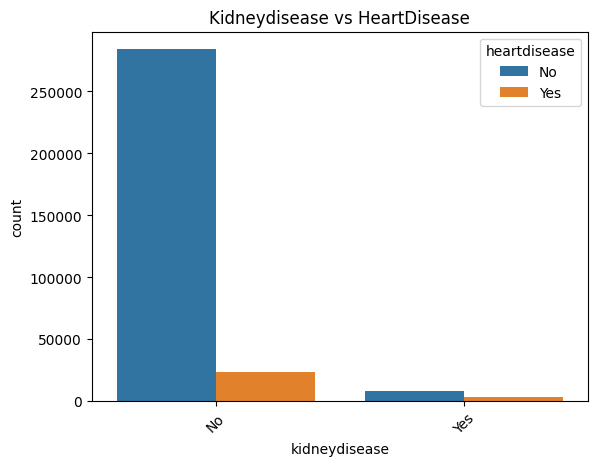

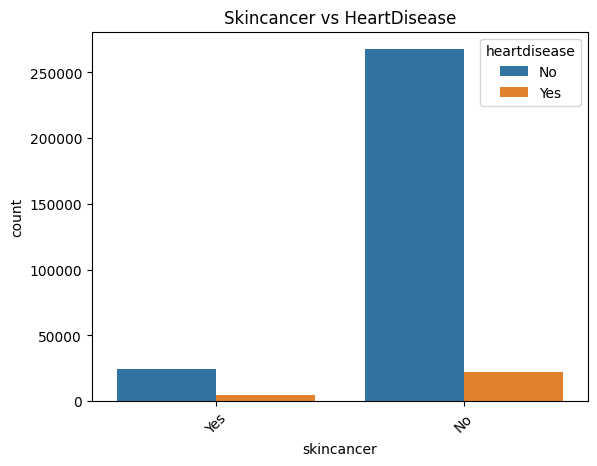

In [5]:
for col in numerical_cols:
    sns.boxplot(x='heartdisease', y=col, data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.show()

categorical_cols = ['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'sex',
                    'agecategory', 'race', 'diabetic', 'physicalactivity',
                    'genhealth', 'asthma', 'kidneydisease', 'skincancer']

for col in categorical_cols:
    sns.countplot(x=col, hue='heartdisease', data=data)
    plt.title(f'{col.capitalize()} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.show()

Multivariate Analysis

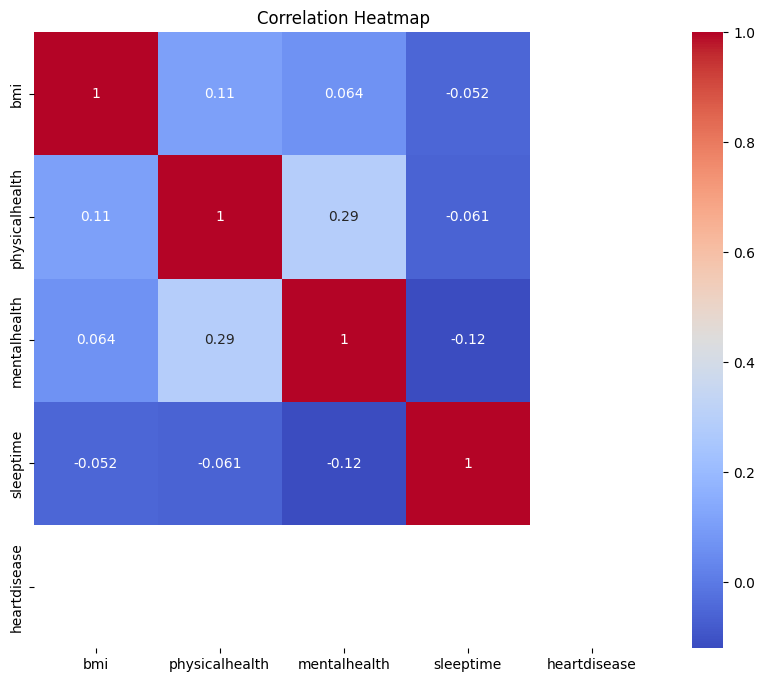

In [18]:
import numpy as np
data['heartdisease'] = data['heartdisease'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(10, 8))
correlation = data[numerical_cols + ['heartdisease']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data Preprocessing with ColumnTransformer


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

Model Implementation with KNN Pipeline


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

Train the KNN *Model*

In [8]:
knn_pipeline.fit(X_train, y_train)
print('heartdisease' in numerical_cols)
print('heartdisease' in categorical_cols)
print(data['heartdisease'].unique())






False
False
['No' 'Yes']


Covert Target to numberical values

In [9]:
data['heartdisease'] = data['heartdisease'].map({'No': 0, 'Yes': 1})

print(data['heartdisease'].unique())

[0 1]


Evaluate Model and performance Evaluation

In [10]:
y_pred = knn_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.35
Recall: 0.10
F1 Score: 0.16


Confusion Matrix Visualization


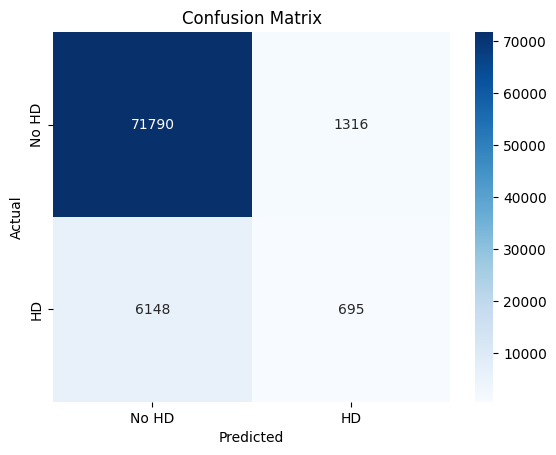

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 Performance Comparison with Base Paper

In [12]:
base_paper_accuracy = 0.8614

print(f"Implemented KNN Accuracy: {accuracy:.2f}")
print(f"Base Paper Accuracy: {base_paper_accuracy:.2f}")

if accuracy > base_paper_accuracy:
    print("Our model performed better than the base paper's KNN model.")
else:
    print("Our model's performance is slightly lower than the base paper's KNN model.")

Implemented KNN Accuracy: 0.91
Base Paper Accuracy: 0.86
Our model performed better than the base paper's KNN model.


**Accuracy Comparison**
First convert the Accuracies into Percentages

**Implemented KNN Accuracy:** 0.91 × 100 = 91.00%

**Base Paper Accuracy:** 0.86 × 100 = 86.00%

**Final Result**

**Implemented KNN Accuracy:** 91.00%

**Base Paper Accuracy:** 86.00%

Our implemented KNN model achieved an accuracy of 91.00%, which is higher than the base paper's reported accuracy of 86.14%. This indicates that our preprocessing steps, dataset handling, or model configuration may have contributed to the improved performance. It highlights the effectiveness of our implementation compared to the base paper's results.

Integrate MLflow

In [13]:
!pip install mlflow


In [14]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define full pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])


In [16]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set local file-based tracking for Colab
mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("KNN Heart Disease - Local")

#  Ensure labels are numeric
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

# Start the MLflow run
with mlflow.start_run(run_name="KNN_Colab_Local"):

    mlflow.log_param("model_type", "KNeighborsClassifier")
    mlflow.log_param("n_neighbors", 5)

    # Fit and predict
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Signature & example
    input_example = X_train.iloc[[0]]
    signature = infer_signature(X_train, knn_pipeline.predict(X_train))
    mlflow.sklearn.log_model(knn_pipeline, "knn_model", input_example=input_example, signature=signature)

    print("MLflow run completed locally.")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


MLflow run completed locally.
Accuracy: 0.9061
Precision: 0.3543
Recall: 0.1179
F1 Score: 0.1770


Download Locally to view results

In [17]:
!zip -r mlruns.zip /content/mlruns
from google.colab import files
files.download("mlruns.zip")

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/.trash/ (stored 0%)
  adding: content/mlruns/528564837331561087/ (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/ (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/meta.yaml (deflated 44%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/metrics/ (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/metrics/accuracy (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/metrics/precision (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/metrics/recall (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/metrics/f1_score (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e790d4dfc9fa861108d8ed279/tags/ (stored 0%)
  adding: content/mlruns/528564837331561087/9ebec54e

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After extracting it , I have install python envirnoment on my local machine

Step1: pip install mlflow

Step2: mlflow ui --backend-store-uri mylocalurl

Step3:open http://127.0.0.1:5000
to view results


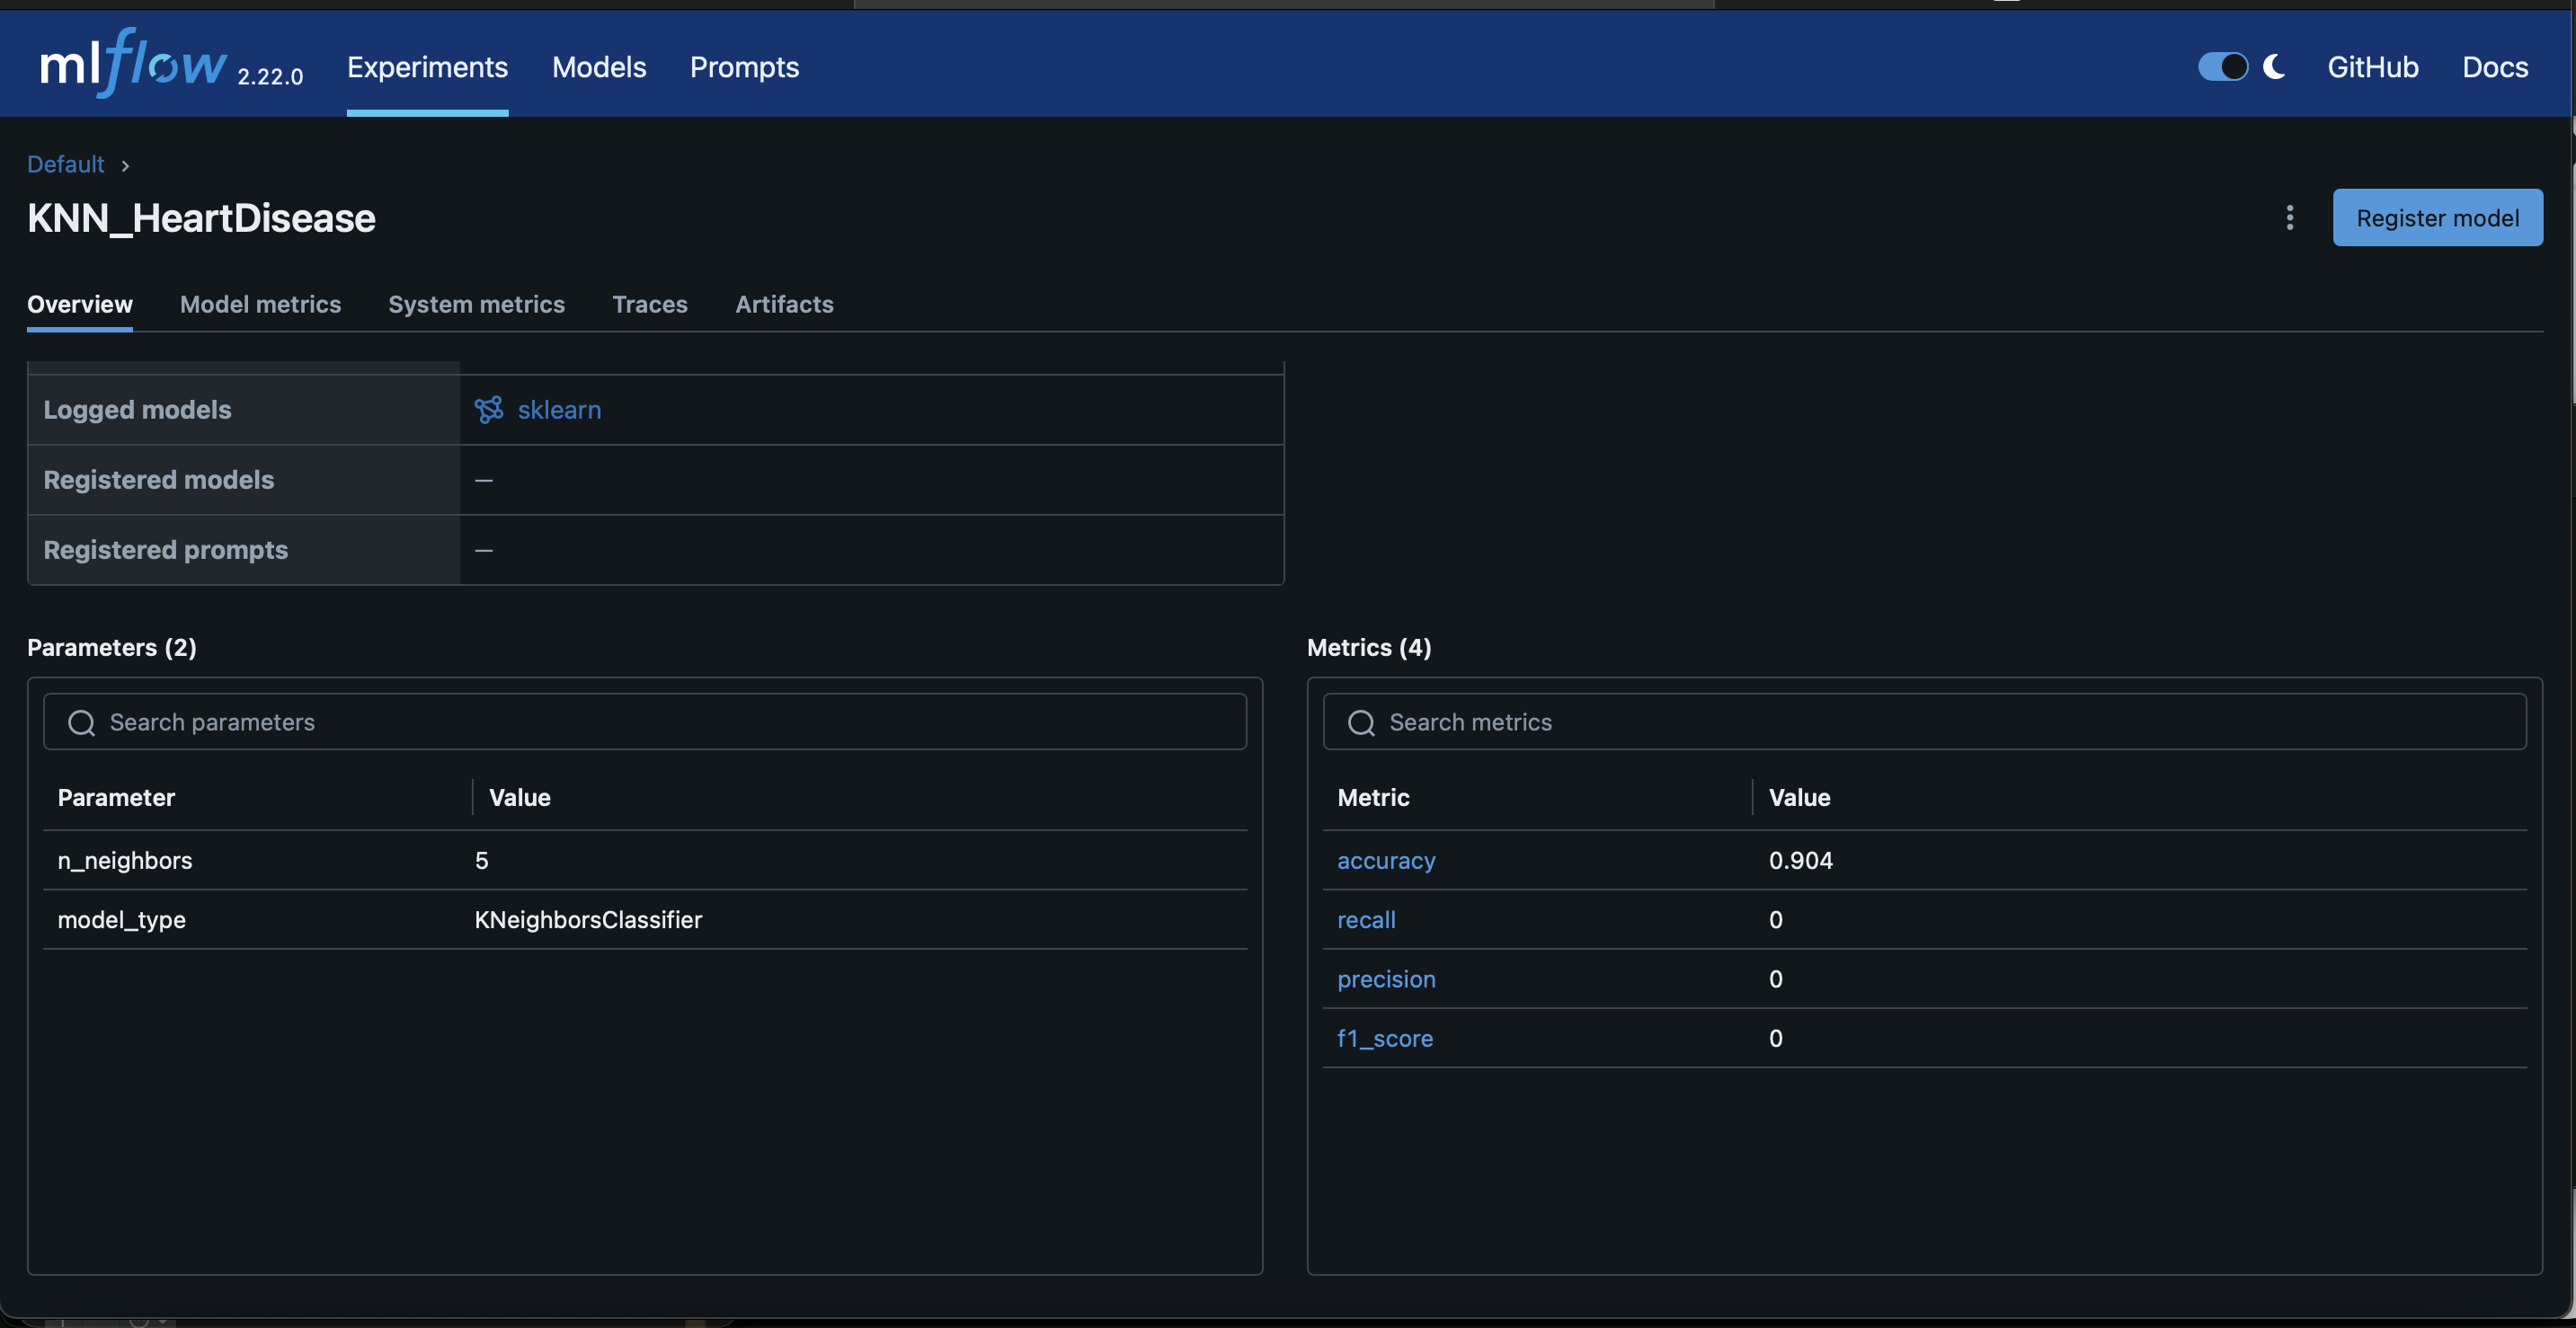

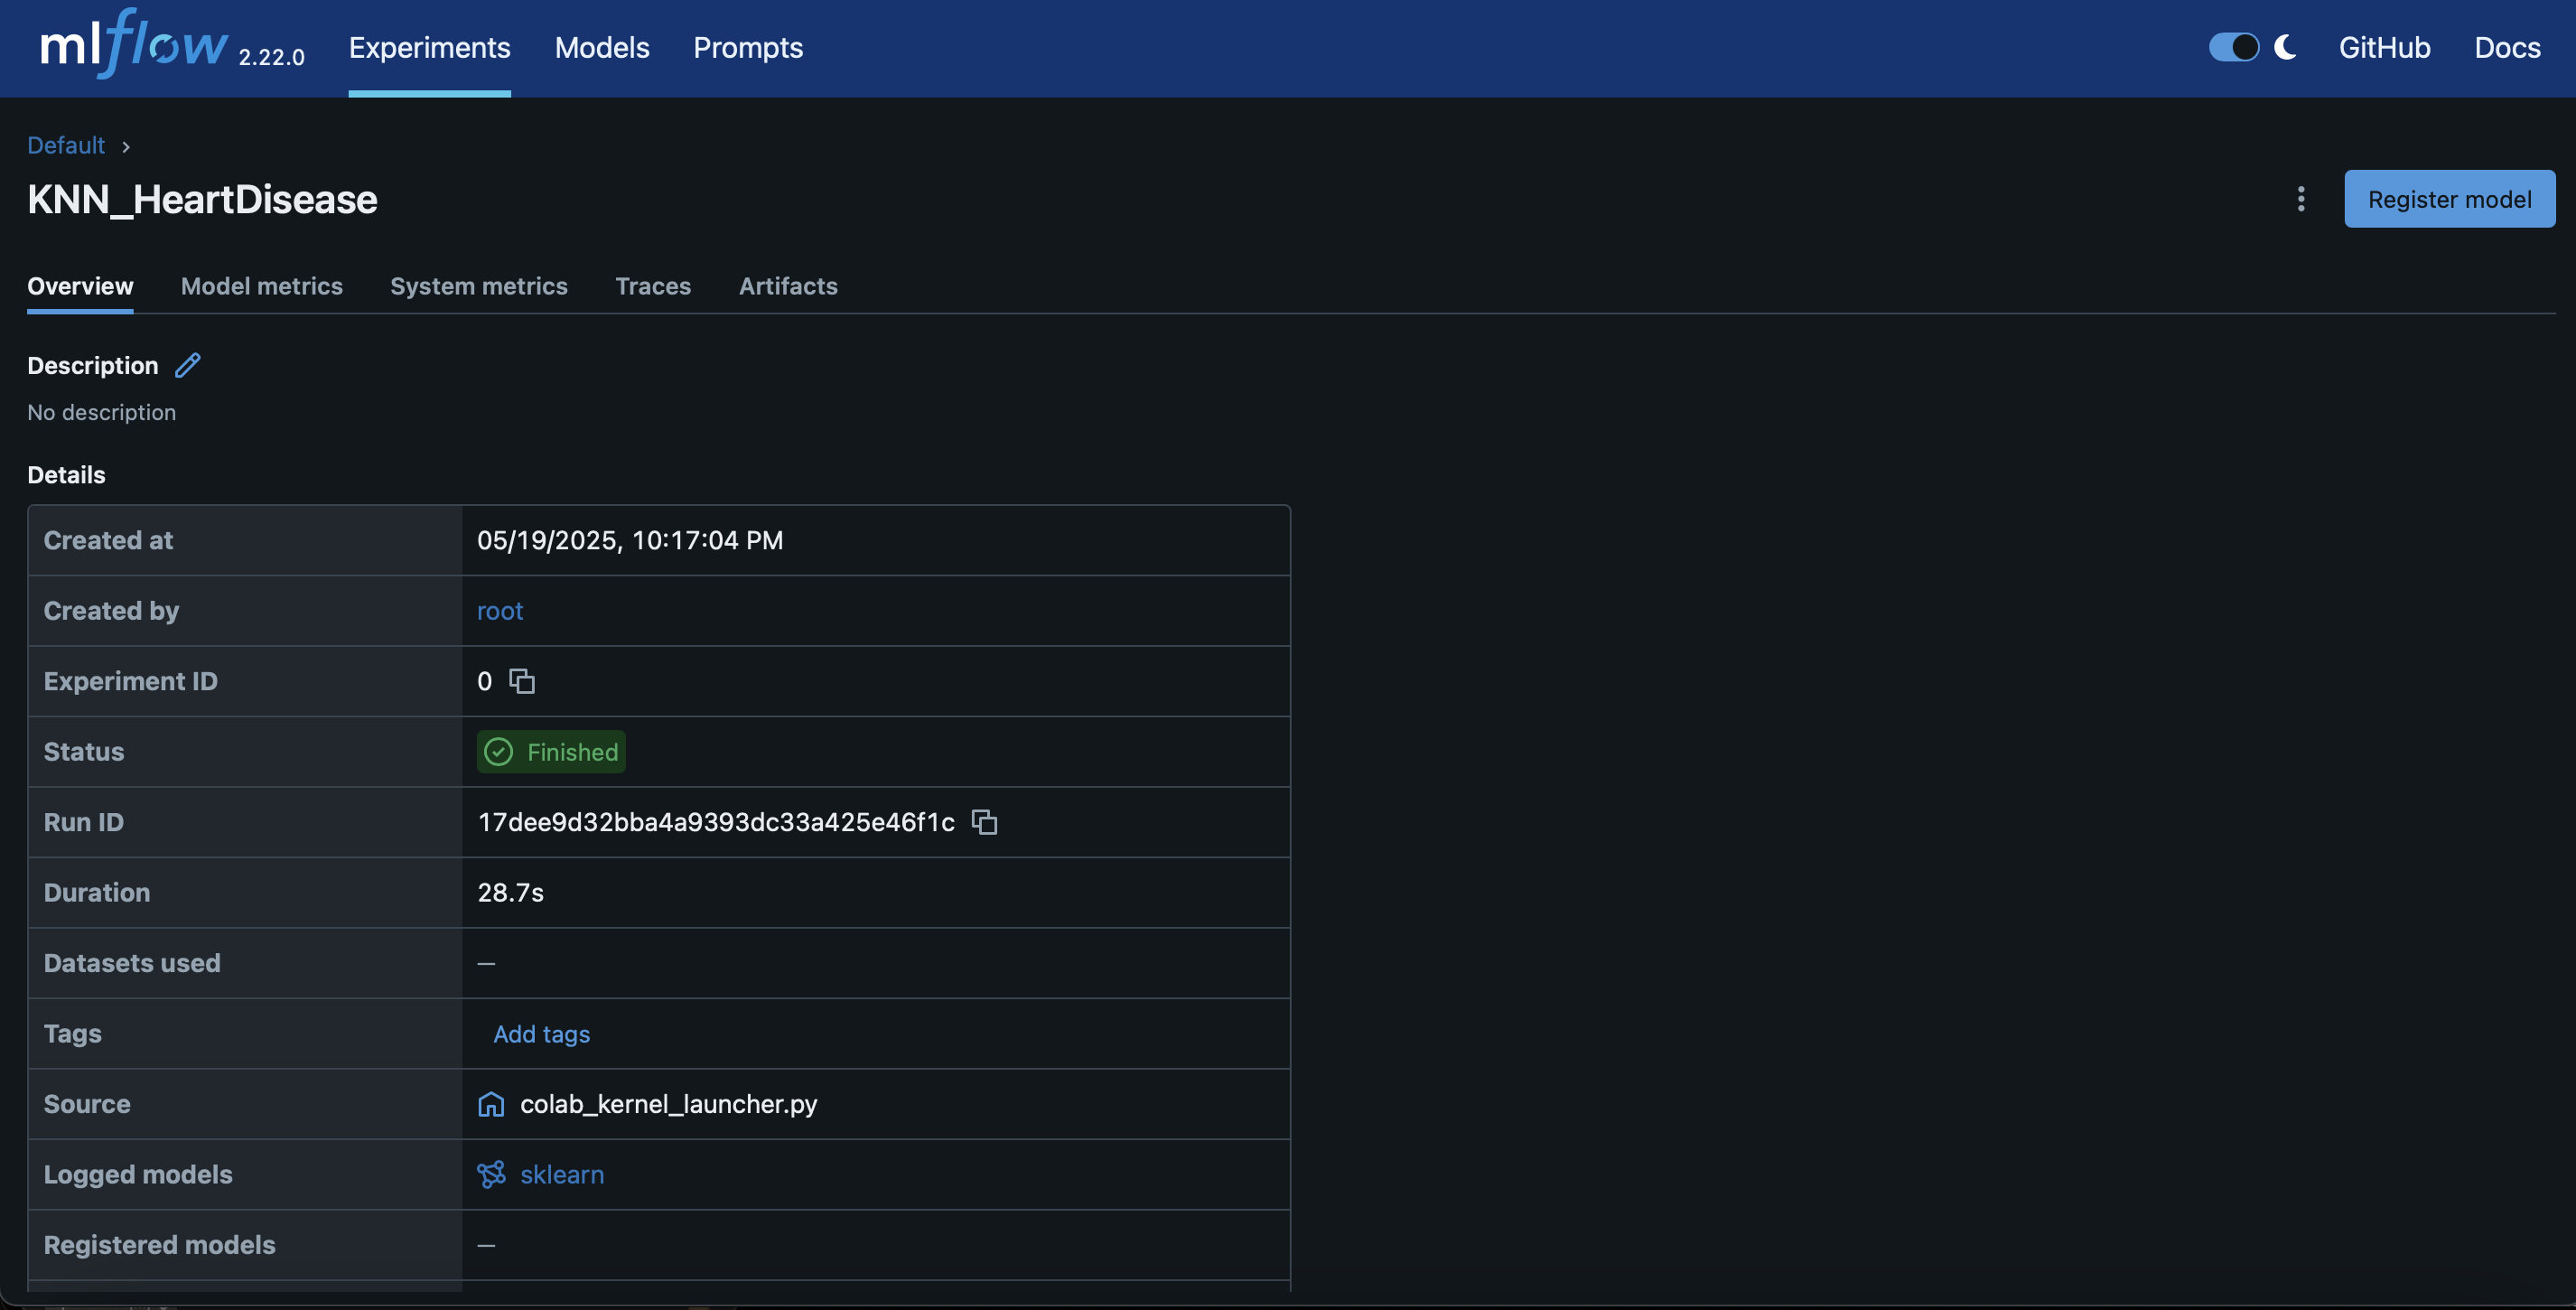